In [1]:
# My code
import fast_gillespie as fg
import fast_gillespie_viz as fgv

In [2]:
#Define linear homopolymer

# Rates in terms of interpretable quantities
mean_num_monomers = 100.0
interactions_param = 40.0  # I don't have a good interpretation for this
rate1 = mean_num_monomers
rate2 = 1.0
rate3 = interactions_param/(mean_num_monomers**2)
rate4 = 1.0

# # Rates from preprint
# rate1 = 200.0   # => mean_num_monomers = 200
# rate2 = 1.0
# rate3 = 0.03 # = interactions_param/(mean_num_monomers**2)
# rate4 = 1.0
# mean_num_monomers = rate1
# interactions_param = rate3 * mean_num_monomers**2

# Print out rate-determining quantities
print('mean_num_monomers = ', mean_num_monomers)
print('interactions_param = ', interactions_param)

# Create fields
A = fg.Field(name='A', index_dim=1)
a = fg.Field(name='a', index_dim=1)
b = fg.Field(name='b', index_dim=1)
J = fg.Field(name='J', index_dim=2)

# Create rules 
R_1 = fg.MonomerCreationRule(name='R_1', rate=rate1, particle=A, sites=[a,b])
R_2 = fg.MonomerAnnihilationRule(name='R_2', rate=rate2, particle=A, sites=[a,b])
R_3 = fg.HeterotypicInteractionCreationRule(name='R_3', rate=rate3, A=A, B=A, a=a, b=b, J=J)
R_4 = fg.HeterotypicInteractionAnnihilationRule(name='R_4', rate=rate4, A=A, B=A, a=a, b=b, J=J)       

# Define fock space and rules
space = fg.FockSpace(fields=[A, a, b, J])
rules = fg.RuleSet(rules=[R_1, R_2, R_3, R_4])

mean_num_monomers =  100.0
interactions_param =  40.0


Progress:   0%|          | 0/30000 [00:00<?, ?it/s]

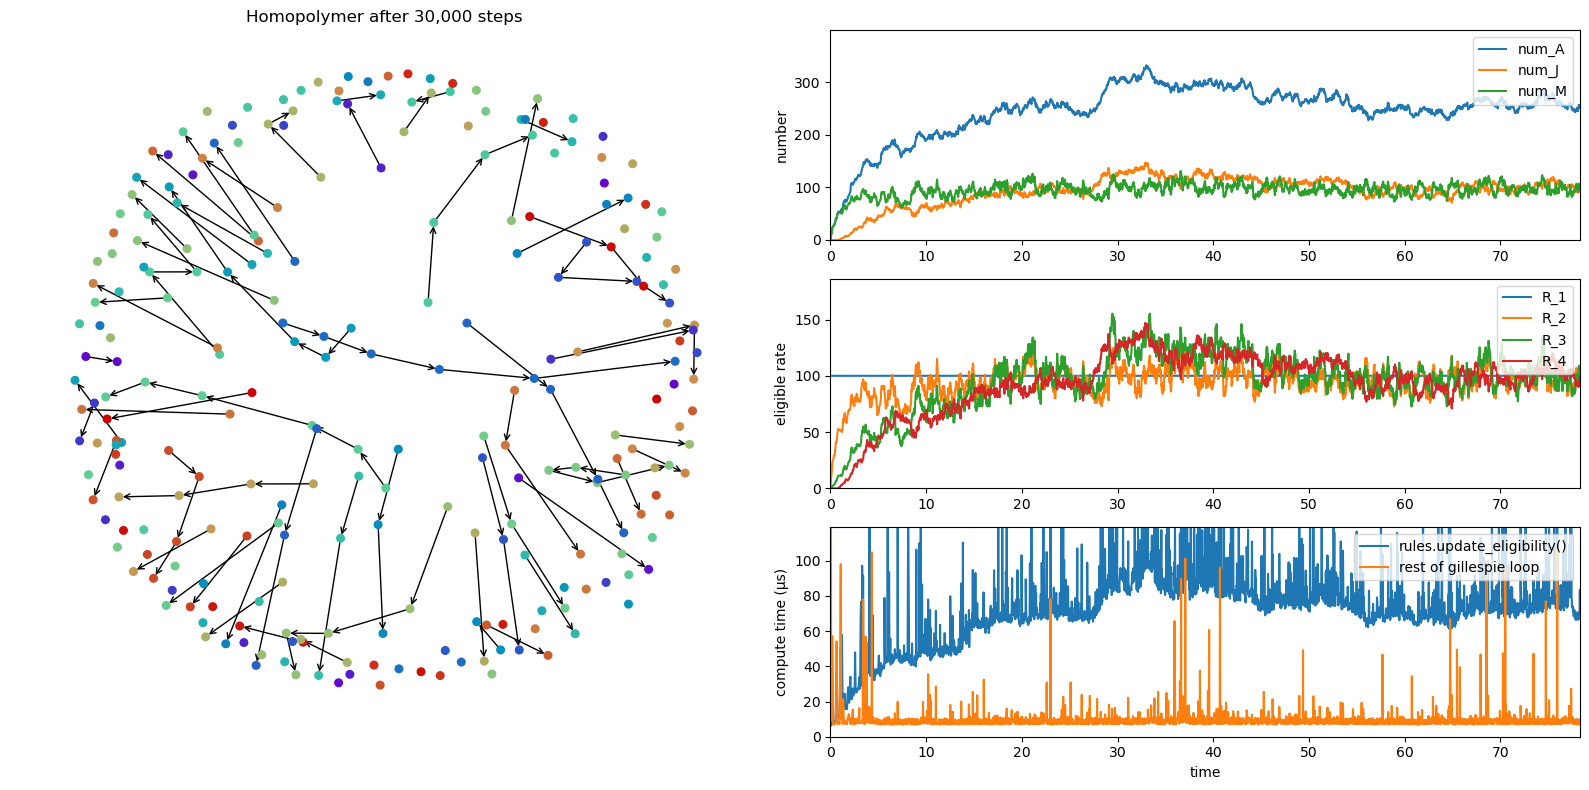

In [3]:
def summary_stats_func():
    particle_field_indices = set(i[0] for i in A.indices)
    interaction_indices = set(i[0] for i in J.indices) | set(i[1] for i in J.indices)
    monomer_indices = particle_field_indices - interaction_indices
    stats_dict = dict(
        num_A=len(A.indices),
        num_J=len(J.indices),
        num_M=len(monomer_indices)
    )
    return stats_dict

# Define, initialize, and run simulation
sim = fg.Simulation(space=space, rules=rules, custom_stats_func=summary_stats_func)
sim.initialize_state()
sim.run(num_steps=30_000, record_every=10)

fgv.show_sim_stats(sim, particle=A, interaction=J, directed=True, x_is_time=True, system_name='Homopolymer')